Sites que me ajudaram: 

* 1º https://sparkbyexamples.com/python-pandas-tutorial-for-beginners/
* 2º https://stackoverflow.com/questions/38361022/how-i-can-calculate-standard-deviation-for-rows-of-a-dataframe
* 3º https://stackoverflow.com/questions/33518124/how-to-apply-a-function-on-every-row-on-a-dataframe

**1º Passo: Calcular a média dos tempos no dataframe dos dados**

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('pendulo.csv', sep=";")
# Criando uma nova coluna para média
# data["Media"] = (data["T1"] + data["T2"] + data["T3"] + data["T4"] + data["T5"])/5

# Podemos calcular a média lendo as linhas(row) com o axis=1 e escolhendo as colunas desejadas
data["T_Media"]= data[["T1","T2","T3","T4","T5"]].mean(axis=1)
data

,L(cm),Ângulo,T1,T2,T3,T4,T5,T_Media
0,100,5º,20.26,19.76,19.99,20.17,20.16,20.068
1,100,10º,20.94,20.49,20.43,20.69,20.52,20.614
2,100,15º,21.13,21.00,21.47,20.71,20.92,21.046
3,100,20º,21.15,21.57,21.39,21.27,21.06,21.288
4,100,30º,21.18,20.98,20.54,20.25,20.43,20.676
5,100,40º,20.95,21.20,20.82,20.59,21.16,20.944
6,90,10º,19.09,18.97,20.20,17.77,19.12,19.030
7,80,10º,17.41,17.87,17.68,17.90,17.64,17.700
8,70,10º,16.72,16.58,16.67,16.60,16.59,16.632
9,60,10º,15.57,14.62,15.48,15.56,15.56,15.358


**2º Passo: Calcular o desvio padrão amostral e gerar uma nova coluna com os valores**

In [2]:
# Criando a coluna para calcular o desvio padrão amostral, ddof = 1, com as colunas T1 a T5
data["DP"] = data[["T1","T2","T3",'T4','T5']].std(ddof=1,axis=1)
data

,L(cm),Ângulo,T1,T2,T3,T4,T5,T_Media,DP
0,100,5º,20.26,19.76,19.99,20.17,20.16,20.068,0.197914
1,100,10º,20.94,20.49,20.43,20.69,20.52,20.614,0.206228
2,100,15º,21.13,21.00,21.47,20.71,20.92,21.046,0.281833
3,100,20º,21.15,21.57,21.39,21.27,21.06,21.288,0.200798
4,100,30º,21.18,20.98,20.54,20.25,20.43,20.676,0.389525
5,100,40º,20.95,21.20,20.82,20.59,21.16,20.944,0.251456
6,90,10º,19.09,18.97,20.20,17.77,19.12,19.030,0.861945
7,80,10º,17.41,17.87,17.68,17.90,17.64,17.700,0.198116
8,70,10º,16.72,16.58,16.67,16.60,16.59,16.632,0.060581
9,60,10º,15.57,14.62,15.48,15.56,15.56,15.358,0.414150


**3º Criando uma coluna para calcular o erro da média**

**Isso é bem útil pq posso criar funções para calculos especificos**

In [3]:
def erro_media(x):
    print("recebe cada valor de DP ", x)
    # print(x/np.sqrt(5))
    return x/np.sqrt(5)


data["Erro_Media"] = data.apply(lambda row: erro_media(row["DP"]),axis=1)
data

recebe cada valor de DP  0.19791412279066914
recebe cada valor de DP  0.2062280291328034
recebe cada valor de DP  0.28183328405282343
recebe cada valor de DP  0.20079840636817892
recebe cada valor de DP  0.38952535219161294
recebe cada valor de DP  0.2514557615168122
recebe cada valor de DP  0.8619454739135184
recebe cada valor de DP  0.19811612756158928
recebe cada valor de DP  0.060580524923443894
recebe cada valor de DP  0.4141497313774336


,L(cm),Ângulo,T1,T2,T3,T4,T5,T_Media,DP,Erro_Media
0,100,5º,20.26,19.76,19.99,20.17,20.16,20.068,0.197914,0.088510
1,100,10º,20.94,20.49,20.43,20.69,20.52,20.614,0.206228,0.092228
2,100,15º,21.13,21.00,21.47,20.71,20.92,21.046,0.281833,0.126040
3,100,20º,21.15,21.57,21.39,21.27,21.06,21.288,0.200798,0.089800
4,100,30º,21.18,20.98,20.54,20.25,20.43,20.676,0.389525,0.174201
5,100,40º,20.95,21.20,20.82,20.59,21.16,20.944,0.251456,0.112454
6,90,10º,19.09,18.97,20.20,17.77,19.12,19.030,0.861945,0.385474
7,80,10º,17.41,17.87,17.68,17.90,17.64,17.700,0.198116,0.088600
8,70,10º,16.72,16.58,16.67,16.60,16.59,16.632,0.060581,0.027092
9,60,10º,15.57,14.62,15.48,15.56,15.56,15.358,0.414150,0.185213


4º Passo: Calcular o periodo(T) e o Periodo ao quadrado(T²)

**Tempo_Medio/ 10**

In [4]:

# Função para calcular o periodo
def Periodo(x):
    return (x)/10

data["T"] = data.apply(lambda row: Periodo(row["T_Media"]),axis=1)


# Função para calcular o periodo ao quadrado
def Periodo2(y):
    return (y/(2*np.pi))**2

data["T²"] = data.apply(lambda row: Periodo2(row["T"]),axis=1)
data        


,L(cm),Ângulo,T1,T2,T3,T4,T5,T_Media,DP,Erro_Media,T,T²
0,100,5º,20.26,19.76,19.99,20.17,20.16,20.068,0.197914,0.088510,2.0068,0.102011
1,100,10º,20.94,20.49,20.43,20.69,20.52,20.614,0.206228,0.092228,2.0614,0.107638
2,100,15º,21.13,21.00,21.47,20.71,20.92,21.046,0.281833,0.126040,2.1046,0.112197
3,100,20º,21.15,21.57,21.39,21.27,21.06,21.288,0.200798,0.089800,2.1288,0.114792
4,100,30º,21.18,20.98,20.54,20.25,20.43,20.676,0.389525,0.174201,2.0676,0.108286
5,100,40º,20.95,21.20,20.82,20.59,21.16,20.944,0.251456,0.112454,2.0944,0.111112
6,90,10º,19.09,18.97,20.20,17.77,19.12,19.030,0.861945,0.385474,1.9030,0.091731
7,80,10º,17.41,17.87,17.68,17.90,17.64,17.700,0.198116,0.088600,1.7700,0.079357
8,70,10º,16.72,16.58,16.67,16.60,16.59,16.632,0.060581,0.027092,1.6632,0.070070
9,60,10º,15.57,14.62,15.48,15.56,15.56,15.358,0.414150,0.185213,1.5358,0.059746


**Criando um novo dataframe apenas com as colunas que queremos**

In [8]:
# Podemos criar nova dataframe com as colunas que queremos utilizando essa sintaxe
new_data = data[["L(cm)","T"]]
new_data

# Podemos utilizar o loc também especificando as colunas e até as linhas que queremos, aqui pegamos todas as colunas
new_data = data.loc[:,["L(cm)", "T²"]]
new_data

# # Aqui estamos pegando as colunas L(cm) e Angulo com as 8 primeiras linhas
# new_data = data.loc[0:8,["L(cm)","Ângulo"]]
# new_data

,L(cm),T²
0,100,0.102011
1,100,0.107638
2,100,0.112197
3,100,0.114792
4,100,0.108286
5,100,0.111112
6,90,0.091731
7,80,0.079357
8,70,0.070070
9,60,0.059746


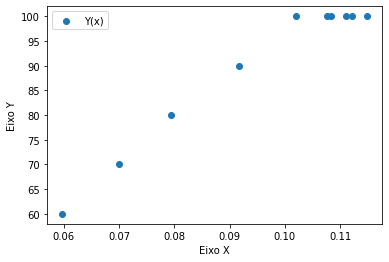

In [9]:
import matplotlib.pylab as plt

plt.scatter(new_data["T²"], new_data["L(cm)"],label="Y(x)");
plt.xlabel("Eixo X");
plt.ylabel("Eixo Y");
plt.legend();
plt.plot();

**Salvando o dataframe em CSV, Excel e Texto**

In [ ]:
# Podemos salvar um novo dataframe para gerar arquivos em excel, csv ou txt
data.to_csv("pendulo2.csv", sep=";",index=False)
# Salvando em txt
data.to_csv("pendulo2.txt")

**Testando funções no Código**

In [ ]:
# def desvio(x,y):
#     return (x+y)/2

# def dobrar(x,y):
#     return x*2,y*2

# def soma(x,y):
#     return x+y  

# data['Dobro'] = data.apply(lambda row: dobrar(row['T1'],row["T2"]), axis=1)
# data

# data['soma'] = data.apply(lambda row: soma(row["T1"],row["T2"]),axis=1)
# data

# data["DP"] = data.apply(lambda row: desvio(row["T1"], row["T2"]), axis=1)
# data

# # Testando criar funções com apply.
# def interview(x):
#     if x['T1'] > 21:
#         return "maneiro"
#     else:
#         return "ok"   

# data['T'] = data.apply(interview, axis=1)
# data


# soma = 0
# count = 0
# for i in data["T1"]:
#     print(i)
#     soma += i
#     count+= 1
# media = soma/count
# print(media) 

# for i in data["T2"]:
#     x = i*10
#     print(x)


# dat = data["T1"].mean()
# dat